<a href='https://www.latos.ai'> <img src='../logo_latos.jpeg' style="width: 200px;" align="right"/></a>
*Esse notebook faz parte do curso de [Python e Ciência de Dados para a Indústria](https://www.latos.ai/academy/python-e-ciencia-de-dados) da [Latos Academy](https://www.latos.ai).*

Latos© copyright 2022. All Rights Reserved.

# Curso rápido de Aprendizado de Máquina - Exercícios 

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

## Análise dos dados

Carregue a base de dados palmerpenguins.

In [2]:
root_dir = Path.cwd().parents[1]
data_dir = root_dir / 'data'

penguins = pd.read_csv(data_dir / 'penguins.csv')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
331,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


Busque informações sobre a base de dados:
* Onde foi coletado?
* O que significa cada variável?
* Quais possíveis objetivos para a classificação, regressão e clusterização seriam possíveis utilizando essa base de dados?

fonte: https://github.com/allisonhorst/palmerpenguins



Faça descobertas sobre os dados:

* quais são as informações estatísticas básicas de cada variável?
* quantos dados de cada espécie estão disponíveis?
* quais variáveis são fortemente correlacionadas?
* existem outliers?

Busque informações sobre a base de dados:

**Respostas**

- Onde foi coletado?

Os dados foram coletados e disponibilidados por Dr. Kristen e a estação de Palmer, Antartida LTER.

- O que significa cada variável?

species: sao três diferentes espécies do pinguim

island: três diferentes ilhas do Arquipélago Palmer, Antártida onde os dados foram coletados 

bill_lenght_mm: comprimento do bico do pinguim em mm

bill_depth_mm: profundidade do bico do pinguim em mm

flipper_length_mm: comprimento da nadadeira do pinguim em mm

body_mass_g: massa do corpo do pinguim em g

sex: sexo do pinguim

- Quais possíveis objetivos para a classificação, regressão e clusterização seriam possíveis utilizando essa base de dados?

Classificação da espécie de acordo com as demais entradas, regressão do tamanho da nadadeira, peso, e clusterização utilizando os dados de entrada.

Faça descobertas sobre os dados:

**Respostas**

Quais são as informações estatísticas básicas de cada variável?

In [3]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Quantos dados de cada espécie estão disponíveis?

In [4]:
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

Quais variáveis são fortemente correlacionadas?

<AxesSubplot:>

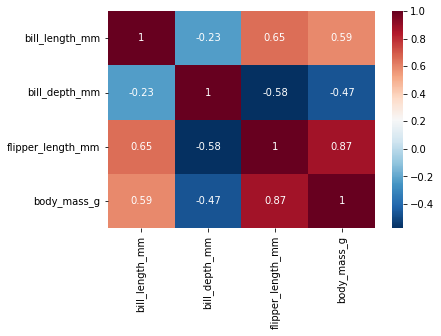

In [5]:
corrmat = penguins.corr()
sns.heatmap(corrmat, annot=True, cmap="RdBu_r")

As variáveis body_mass_g e flipper_lenght_mm são fortemente correlacionadas.

Existem outliers?

<AxesSubplot:>

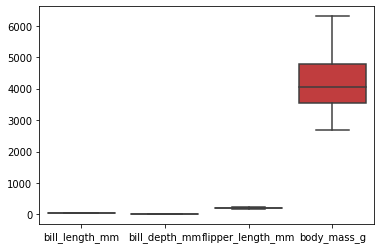

In [6]:
sns.boxplot(data=penguins)

Sem outliers.

## Classificação

Crie um modelo de classificação das espécies de pinguim seguindo:
* utilize para X as variáveis ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island', 'sex']
* utilize para y a variável 'species'
* separe dados em treino e teste (20%)
* treine um modelo de árvores aleatórias
* compare os valores preditos para o y de teste com os valores reais
* treine outros modelos para comparar com o modelo de árvores aleatórias

In [7]:
dummies = pd.get_dummies(penguins, drop_first=True)
dummies

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181,3750,0,0,0,1,1
1,39.5,17.4,186,3800,0,0,0,1,0
2,40.3,18.0,195,3250,0,0,0,1,0
3,36.7,19.3,193,3450,0,0,0,1,0
4,39.3,20.6,190,3650,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
328,47.2,13.7,214,4925,0,1,0,0,0
329,46.8,14.3,215,4850,0,1,0,0,0
330,50.4,15.7,222,5750,0,1,0,0,1
331,45.2,14.8,212,5200,0,1,0,0,0


In [8]:
dummies.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler
variables = ['bill_length_mm', 'bill_depth_mm',
             'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler().fit_transform(dummies[variables])
new_df = pd.DataFrame(scaler, columns=variables)

In [10]:
var_dummies = ['species_Chinstrap', 'species_Gentoo',
               'island_Dream', 'island_Torgersen', 'sex_MALE']

new_df[var_dummies] = dummies[var_dummies]

In [11]:
X = new_df[new_df.columns.difference(['species_Chinstrap', 'species_Gentoo'])]
y = new_df[['species_Chinstrap', 'species_Gentoo']]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123)

In [13]:
from sklearn import tree

mod = tree.DecisionTreeClassifier(max_depth=3)
mod.fit(X_train, y_train)
prediction = mod.predict(X_test)
metrics.accuracy_score(prediction, y_test)

0.9552238805970149

In [14]:
from sklearn.ensemble import RandomForestClassifier

mod = RandomForestClassifier()
mod.fit(X_train, y_train)
prediction = mod.predict(X_test)
metrics.accuracy_score(prediction, y_test)

0.9552238805970149

## Clusterização
Agora, considerando que não temos a coluna das espécies, utilize o método KMeans para clusterizar os dados de testes utilizados para a classificação anterior.

In [15]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=3)
prediction = k_means.fit_predict(X_train)
prediction

array([1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1,
       0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1,
       2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1,
       1, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0,
       2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       2, 1], dtype=int32)

In [16]:
new_train = []
for index, row in y_train.iterrows():
    if row['species_Chinstrap'] == 1 and row['species_Gentoo'] == 0:
        new_train.append('species_Chinstrap')
    elif row['species_Chinstrap'] == 0 and row['species_Gentoo'] == 1:
        new_train.append('species_Gentoo')
    else:
        new_train.append('species_Adelie')
new_train = pd.DataFrame(new_train)

In [17]:
di = {'species_Gentoo': 1, 'species_Chinstrap': 0, 'species_Adelie': 2}
y_train_num = new_train.replace(di)

In [18]:
metrics.accuracy_score(prediction, y_train_num)

0.9473684210526315

In [19]:
X_train['prediction'] = prediction

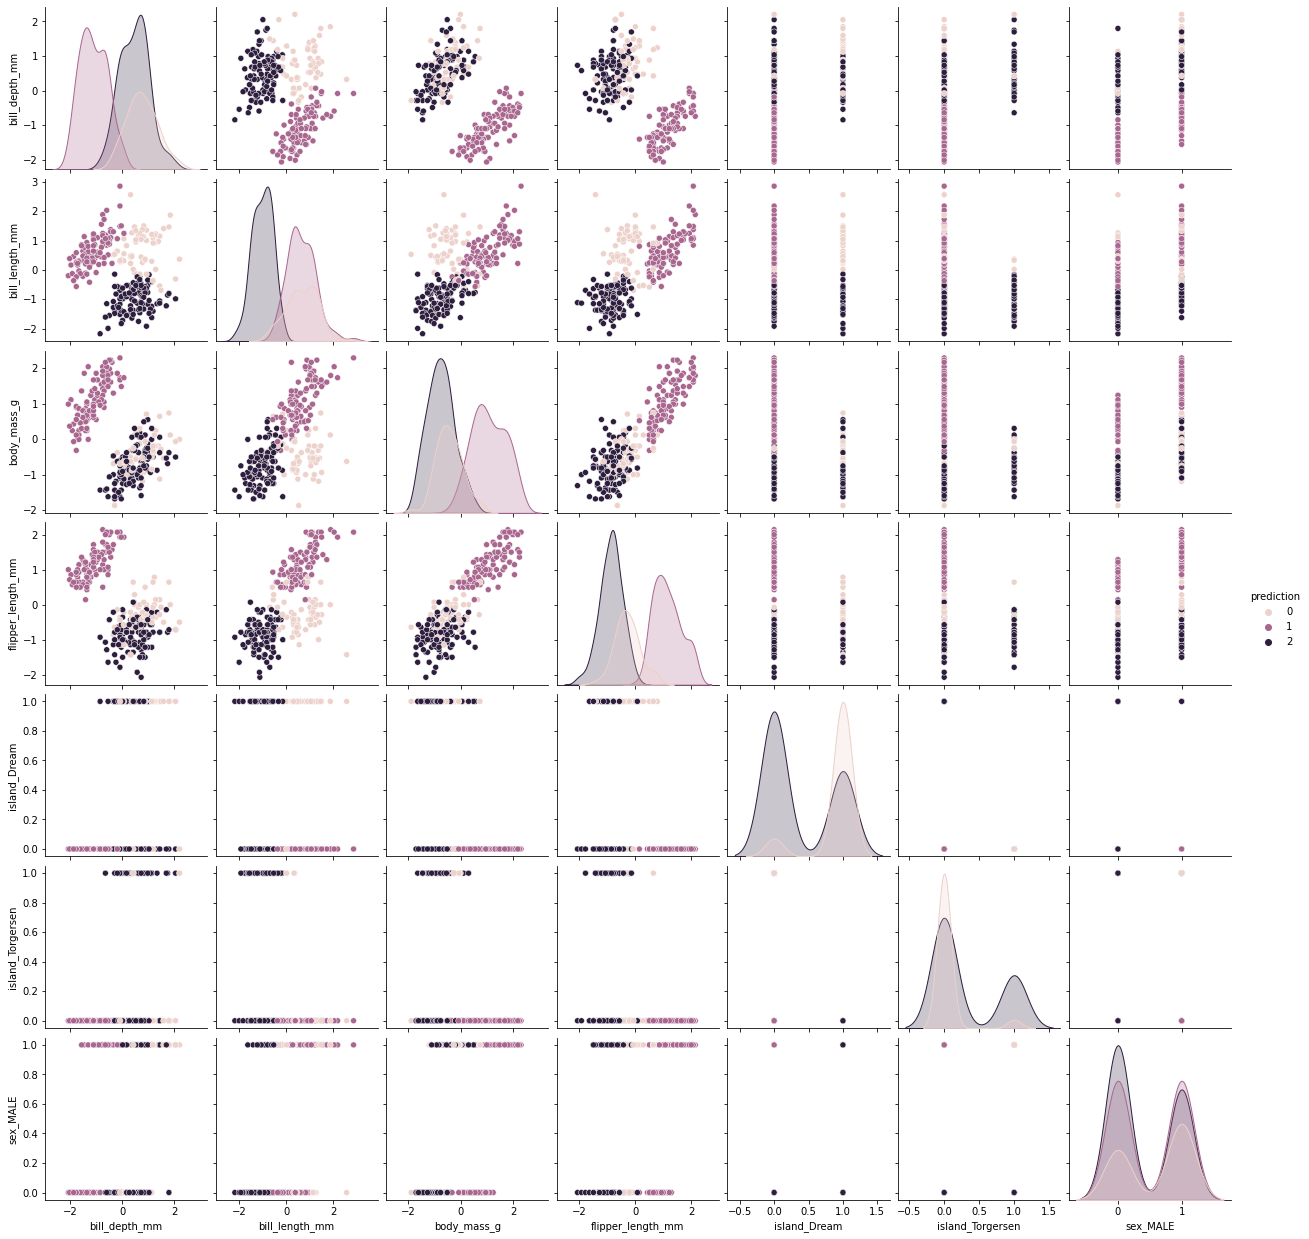

In [20]:
sns.pairplot(X_train, hue='prediction')